In [1]:
DATASET_PATH = '../kaggle_dataset/news_prepped.csv'
import numpy as np
import pandas as pd
import nltk
from string import punctuation #for recognizing and removing
from nltk.corpus import stopwords #for recognizing and removing
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\stefa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\stefa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\stefa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\stefa\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [3]:
df = pd.read_csv(DATASET_PATH)
df = df.drop('id', axis = 1)
df = df.rename(columns= {'label':'lbl'})
df.head()

,title,text,lbl
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [4]:
df.shape

(6335, 3)

In [5]:
columns = ['title', 'text']
for col in columns:
    df[col] = df[col].str.lower()
df

,title,text,lbl
0,you can smell hillary’s fear,"daniel greenfield, a shillman journalism fello...",1
1,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...,1
2,kerry to go to paris in gesture of sympathy,u.s. secretary of state john f. kerry said mon...,0
3,bernie supporters on twitter erupt in anger ag...,"— kaydee king (@kaydeeking) november 9, 2016 t...",1
4,the battle of new york: why this primary matters,it's primary day in new york and front-runners...,0
...,...,...,...
6330,state department says it can't find emails fro...,the state department told the republican natio...,0
6331,the ‘p’ in pbs should stand for ‘plutocratic’ ...,the ‘p’ in pbs should stand for ‘plutocratic’ ...,1
6332,anti-trump protesters are tools of the oligarc...,anti-trump protesters are tools of the oligar...,1
6333,"in ethiopia, obama seeks progress on peace, se...","addis ababa, ethiopia —president obama convene...",0


Define specialized functions for removing stop words and punctuation from a given statement list

In [18]:
import re
from nltk.corpus import words
punctuation+='’‘“”–'
def removePunctuation(statements):
    for i in range(len(statements)):
        for p in punctuation:
            statements[i] = statements[i].replace(p, ' ')
            statements[i] = ' '.join(statements[i].split())
    return statements

def removeStopWords(statements):
    stopword_set = set(stopwords.words('english'))
    for i in range(len(statements)):
        statements[i] = ' '.join([word for word in statements[i].split() if word not in stopword_set])
    return statements

def lemmatize(statements):
    lemmatizer = WordNetLemmatizer()
    for i in range(len(statements)):
        statements[i] = ' '.join([lemmatizer.lemmatize(word, pos='n') for word in statements[i].split()])
    for i in range(len(statements)):
        statements[i] = ' '.join([lemmatizer.lemmatize(word, pos='a') for word in statements[i].split()])
    for i in range(len(statements)):
        statements[i] = ' '.join([lemmatizer.lemmatize(word, pos='r') for word in statements[i].split()])
    for i in range(len(statements)):
        statements[i] = ' '.join([lemmatizer.lemmatize(word, pos='v') for word in statements[i].split()])
    return statements

def removeRegex(statements):
    pattern = re.compile(r"\b[A-Za-z]+\b")
    for i in range(len(statements)):
        statements[i] = ' '.join([word for word in statements[i].split() if pattern.fullmatch(word)])
    return statements

def removeNonEnglishWords(statements):
    for i in range(len(statements)):
        statements[i] = ' '.join([word for word in statements[i].split() if word in words.words()])
    

Prepare the titles and the text

In [7]:
preppedText = removePunctuation(list(df['title']))
preppedText = removeStopWords(preppedText)
preppedTitles = lemmatize(preppedText)

In [8]:
preppedText = removePunctuation(list(df['text']))
preppedText = removeStopWords(preppedText)
preppedTexts = lemmatize(preppedText)

In [9]:
df.isna().sum()

title    0
text     0
lbl      0
dtype: int64

Visualize using a word cloud

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def wordCloud(text):
    # Sample text data
    #text = " ".join(preppedTitles)
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # Hide axes
    plt.show()

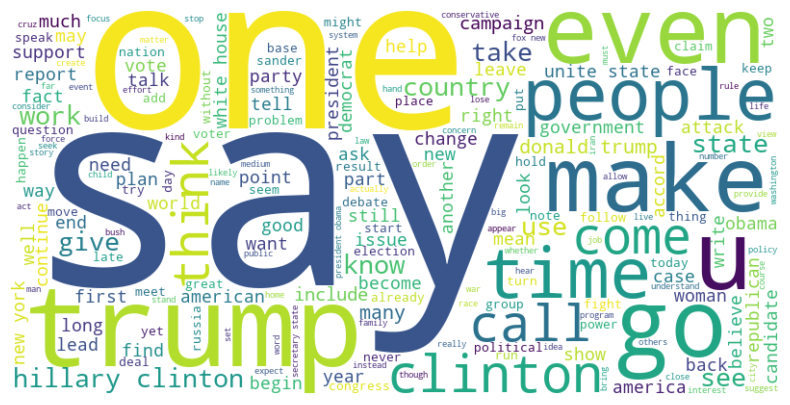

In [11]:
wordCloud(" ".join(preppedTexts))

In [12]:
prepped_df = pd.DataFrame({'title':preppedTitles, 'text':preppedTexts, 'lbl':df['lbl']})
prepped_df

,title,text,lbl
0,smell hillary fear,daniel greenfield shillman journalism fellow f...,1
1,watch exact moment paul ryan commit political ...,google pinterest digg linkedin reddit stumbleu...,1
2,kerry go paris gesture sympathy,u secretary state john f kerry say monday stop...,0
3,bernie supporter twitter erupt anger dnc try warn,— kaydee king kaydeeking november 9 2016 lesso...,1
4,battle new york primary matter,primary day new york front runner hillary clin...,0
...,...,...,...
6330,state department say find email clinton specia...,state department tell republican national comm...,0
6331,p pb stand plutocratic pentagon,p pb stand plutocratic pentagon post oct 27 20...,1
6332,anti trump protester tool oligarchy information,anti trump protester tool oligarchy reform al...,1
6333,ethiopia obama seek progress peace security ea...,addis ababa ethiopia —president obama convene ...,0


In [13]:
prepped_df.isna().sum()

title    0
text     0
lbl      0
dtype: int64

Word cloud for fake news

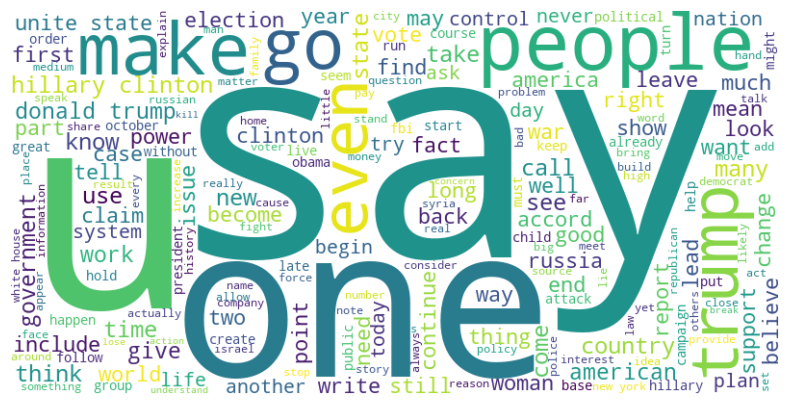

In [14]:
wordCloud(' '.join(prepped_df[prepped_df['lbl'] == 1]['text']))

Word cloud for true news

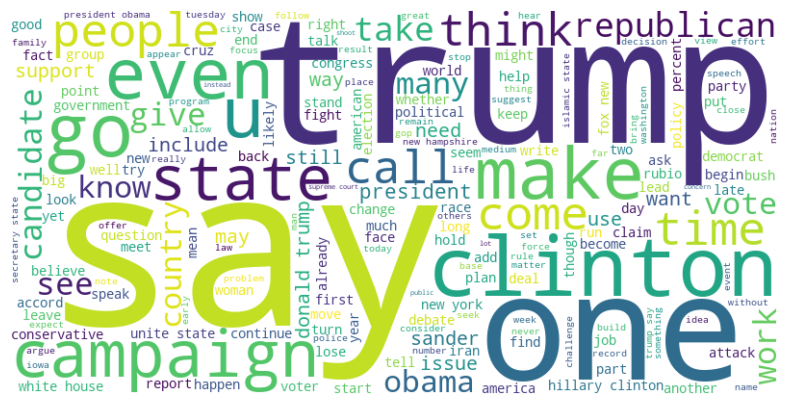

In [15]:
wordCloud(' '.join(prepped_df[prepped_df['lbl'] == 0]['text']))

Save to csv

In [16]:
prepped_df.to_csv('../kaggle_dataset/news_prepped_full.csv')

TF-IDF Vectorization on both titles and text

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

#prepped_df = pd.read_csv('../kaggle_dataset/news_prepped_full.csv')

# Sample list of strings
text_list = removeRegex(list(prepped_df['text']))
#text_list = removeNonEnglishWords(text_list) #THIS TAKES A WHILE
# Regex pattern explanation:
# - `\b[A-Za-z0-9]+\b` → Matches only Latin words and numbers.

#remove very common and very rare words
vectorizer = TfidfVectorizer(min_df=0.2, max_df=0.8)
tfidf_matrix = vectorizer.fit_transform(text_list)
# Convert to DataFrame
tfidf_df_text = pd.DataFrame(tfidf_matrix.todense(), columns=vectorizer.get_feature_names_out())
tfidf_df_text['lbl'] = prepped_df['lbl']
tfidf_df_text.to_csv('../kaggle_dataset/news_tfidf_text.csv', index= False)

In [29]:
result_df = pd.read_csv('../kaggle_dataset/news_tfidf_text.csv')
result_df.isna().sum().sum()

np.int64(0)

In [30]:
result_df.head()

,accord,add,allow,already,also,america,american,among,another,appear,...,win,without,woman,work,world,would,write,year,yet,lbl
0,0.000000,0.0,0.037253,0.072356,0.045443,0.000000,0.026805,0.000000,0.0,0.036397,...,0.000000,0.07152,0.036966,0.000000,0.000000,0.022013,0.000000,0.046083,0.000000,1
1,0.000000,0.0,0.000000,0.089630,0.000000,0.000000,0.000000,0.000000,0.0,0.090173,...,0.000000,0.00000,0.091581,0.000000,0.077949,0.054537,0.000000,0.000000,0.000000,1
2,0.000000,0.0,0.000000,0.000000,0.000000,0.096716,0.231899,0.103827,0.0,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066448,0.000000,0
3,0.066107,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.074316,0.0,0.000000,...,0.000000,0.00000,0.000000,0.112672,0.000000,0.000000,0.070498,0.000000,0.000000,1
4,0.000000,0.0,0.000000,0.000000,0.050593,0.000000,0.000000,0.000000,0.0,0.000000,...,0.547702,0.00000,0.000000,0.000000,0.000000,0.049015,0.000000,0.051305,0.081349,0


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

#prepped_df = pd.read_csv('../kaggle_dataset/news_prepped_full.csv')

# Sample list of strings
text_list = removeRegex(list(prepped_df['title']))
#text_list = removeNonEnglishWords(text_list) #THIS TAKES A WHILE
# Regex pattern explanation:
# - `\b[A-Za-z0-9]+\b` → Matches only Latin words and numbers.

#remove very common and very rare words
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(text_list)
# Convert to DataFrame
tfidf_df_text = pd.DataFrame(tfidf_matrix.todense(), columns=vectorizer.get_feature_names_out())
tfidf_df_text['lbl'] = prepped_df['lbl']
#tfidf_df_text.to_csv('../kaggle_dataset/news_tfidf_title.csv', index= False)
tfidf_df_text

,aap,abadi,abandon,abby,abc,abduct,abdullah,abedin,ability,able,...,zimbabwe,zion,zionist,zip,zone,ztech,zuckerberg,zuesse,zulu,lbl
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
result_df = pd.read_csv('../kaggle_dataset/news_tfidf_title.csv')
result_df.isna().sum().sum()